<a href="https://colab.research.google.com/github/Anushka-999/Sales_Forecast_Project/blob/main/Sales_Forecast_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib scikit-learn


In [ ]:
import pandas as pd

# Load datasets
stores_df = pd.read_csv("stores data-set.csv")
features_df = pd.read_csv("Features data set.csv")
sales_df = pd.read_csv("sales data-set.csv")

# Convert Date columns to datetime format
features_df["Date"] = pd.to_datetime(features_df["Date"], dayfirst=True)
sales_df["Date"] = pd.to_datetime(sales_df["Date"], dayfirst=True)

# Display first few rows
stores_df.head(), features_df.head(), sales_df.head()

(   Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863
 4      5    B   34875,
    Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
 0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
 1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
 2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
 3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
 4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   
 
    MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN  211.350143         8.

In [ ]:
# Merge datasets
df = sales_df.merge(features_df, on=["Store", "Date"], how="left").merge(stores_df, on="Store", how="left")

# Display merged dataset
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
# Fill missing markdown values with 0
df.fillna({"MarkDown1": 0, "MarkDown2": 0, "MarkDown3": 0, "MarkDown4": 0, "MarkDown5": 0}, inplace=True)

# Fill missing CPI and Unemployment with median
df.loc[:, "CPI"] = df["CPI"].fillna(df["CPI"].median())
df.loc[:, "Unemployment"] = df["Unemployment"].fillna(df["Unemployment"].median())

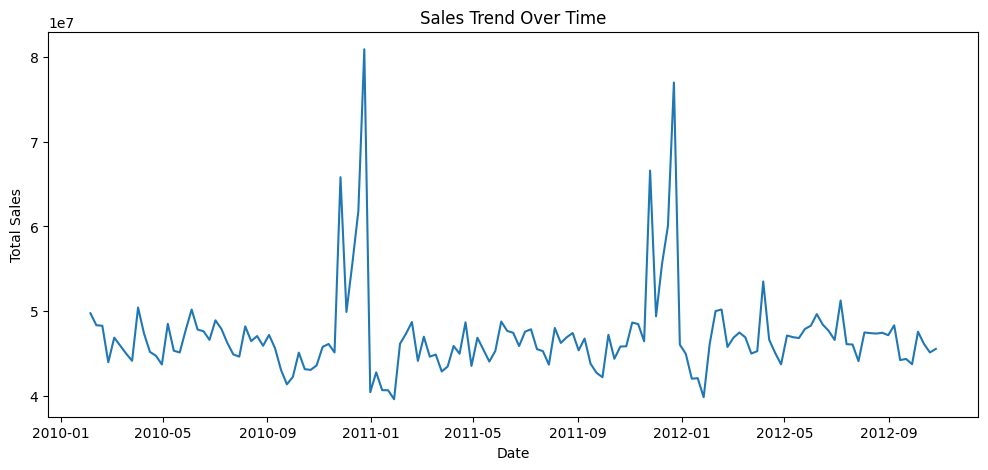

In [ ]:
import matplotlib.pyplot as plt

# Aggregate weekly sales
df_grouped = df.groupby("Date")["Weekly_Sales"].sum()

# Plot sales trend
plt.figure(figsize=(12,5))
plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.show()

In [ ]:
# Top 5 performing stores
top_stores = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(5)
print(top_stores)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
# Save processed data for Power BI
df.to_csv("processed_sales_data.csv", index=False)

In [ ]:
# Train a Regression Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Verify available columns
print(df.columns)

# Select features
features = ["Store", "Dept", "Temperature", "Fuel_Price", "CPI", "Unemployment", "IsHoliday_x","IsHoliday_y"]
X = df[features]
y = df["Weekly_Sales"]

# Convert categorical data
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')
Mean Absolute Error: 1921.919205706051


In [14]:
import numpy as np

# Predict future sales
future_dates = pd.date_range(start="2023-01-01", periods=12, freq="W")
future_data = X_test.sample(12, random_state=42)  # Using sample as new data
future_sales = model.predict(future_data)

# Display results
forecast = pd.DataFrame({"Date": future_dates, "Predicted_Sales": future_sales})
print(forecast)


         Date  Predicted_Sales
0  2023-01-01        8661.0859
1  2023-01-08         131.6068
2  2023-01-15          62.7180
3  2023-01-22        8682.1484
4  2023-01-29       11547.4393
5  2023-02-05       29382.9678
6  2023-02-12       11557.8369
7  2023-02-19         670.2802
8  2023-02-26       35179.6728
9  2023-03-05       82149.0673
10 2023-03-12          12.6874
11 2023-03-19       40246.4240
